In [ ]:
#@title Importing Packages
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#@title Functions
def Best_NextState(V, ps, ph, Reward, Gamma, n):
  NS = np.zeros(n+1) # s = 0 can be a next state
  for i in range(1, min(ps, 100-ps)+1):
    NS[i] = ph * (Reward[ps+i] + V[ps+i] * Gamma) + (1-ph) * (Reward[ps-i] + V[ps-i] * Gamma)
  Arg = np.argmax(NS); Max = np.max(NS)
  return Arg, Max

def Value_Iteration(ph, Gamma, thr, n):
  Reward = np.append(np.zeros(n),1)
  V = np.zeros(n+1)
  policy = np.zeros(n)

  while True:
    delta = 0
    for s in range(1,n):
      v = V[s]
      _, V[s] = Best_NextState(V, s, ph, Reward, Gamma, n)
      delta = max(delta, np.abs(v - V[s]))
    if (delta < thr):
      break

  for s in range(1,n):
    policy[s], _ = Best_NextState(V, s, ph, Reward, Gamma, n)

  Result_showing(V, policy, n, ph)
  return V, policy

def Result_showing(V, policy, n, ph):
  plt.figure(figsize=(15, 5)) 
  plt.subplot(1, 2, 1)
  plt.bar(range(n), policy)
  plt.xlabel('s (state)')
  plt.ylabel('Policy(s)')
  plt.title(f'Optimized Policy for ph = {ph}')
  plt.subplot(1, 2, 2)
  plt.plot(range(n), V[:-1])
  plt.xlabel('s (state)')
  plt.ylabel('V(s)')
  plt.title(f'Optimized Value for ph = {ph}')

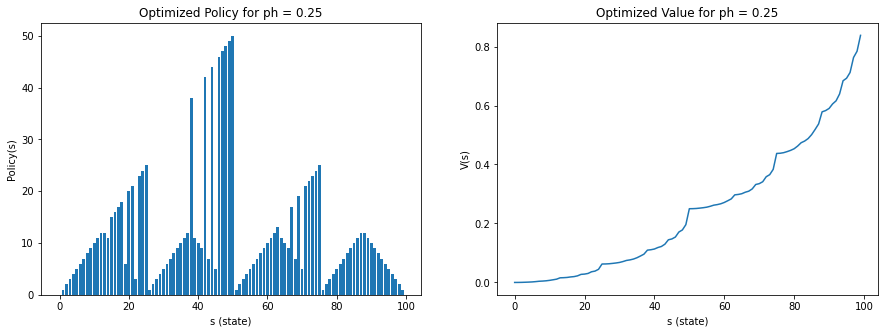

In [ ]:
#@title Showing the results - ph = 0.25
V, policy = Value_Iteration(ph = 0.25, Gamma = 1, thr = 1e-4, n = 100)

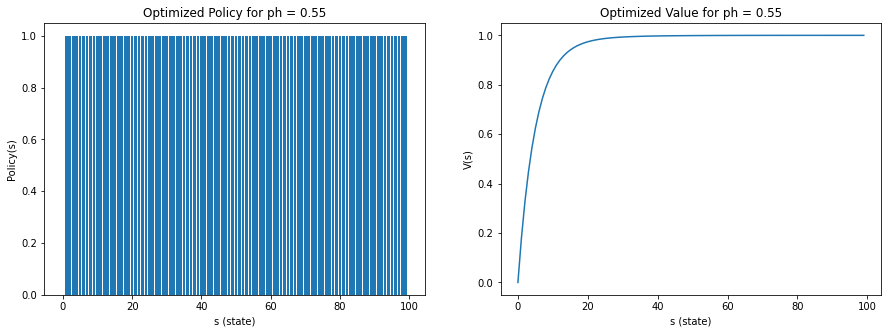

In [ ]:
#@title Showing the results - ph = 0.55
V, policy = Value_Iteration(ph = 0.55, Gamma = 1, thr = 1e-4, n = 100)